In [1]:
import pandas as pd    
import numpy as np    
import yfinance as yf    
import matplotlib.pyplot as plt    
import seaborn as sns    
import missingno as msno  

import warnings  
warnings.simplefilter(action='ignore', category=FutureWarning)  

<span style="font-size: 20px;">1. Data Preparation</span>

In [2]:
# Define a list of stock ticker symbols to fetch data for  
stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]  # Apple, Microsoft, Google, Amazon, Tesla  

# Download historical stock data (OHLC - Open, High, Low, Close, Volume, Adj Close)  
# Data is fetched from Yahoo Finance for the given date range (2020-01-01 to 2024-12-24)  
data = yf.download(stocks, start="2024-01-01", end="2024-12-31")  

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [3]:
# Display a concise summary of the dataset  
# This includes the number of non-null values, data types of each column, and memory usage  
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-01-02 to 2024-12-30
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, AAPL)    251 non-null    float64
 1   (Close, AMZN)    251 non-null    float64
 2   (Close, GOOGL)   251 non-null    float64
 3   (Close, MSFT)    251 non-null    float64
 4   (Close, TSLA)    251 non-null    float64
 5   (High, AAPL)     251 non-null    float64
 6   (High, AMZN)     251 non-null    float64
 7   (High, GOOGL)    251 non-null    float64
 8   (High, MSFT)     251 non-null    float64
 9   (High, TSLA)     251 non-null    float64
 10  (Low, AAPL)      251 non-null    float64
 11  (Low, AMZN)      251 non-null    float64
 12  (Low, GOOGL)     251 non-null    float64
 13  (Low, MSFT)      251 non-null    float64
 14  (Low, TSLA)      251 non-null    float64
 15  (Open, AAPL)     251 non-null    float64
 16  (Open, AMZN)     251 non-null    float64
 1

In [4]:
# Display the first five rows of the dataset  
# This helps in getting an initial look at the structure and values of the data  
print(data.head())  

Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA   
Date                                                                     
2024-01-02  184.532089  149.929993  137.670929  367.380585  248.419998   
2024-01-03  183.150391  148.470001  138.418228  367.113159  238.449997   
2024-01-04  180.824356  144.570007  135.897354  364.478180  237.929993   
2024-01-05  180.098694  145.240005  135.239746  364.289978  237.490005   
2024-01-08  184.452560  149.100006  138.338516  371.164673  240.449997   

Price             High                                                  ...  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA  ...   
Date                                                                    ...   
2024-01-02  187.315382  152.380005  138.946304  372.363258  251.250000  ...   
2024-01-03  184.770668  151.050003  139.125670  369.748136  245.679993  ...   
2024-01-04  

In [5]:
# Convert the dataset from wide format (multi-index columns for each stock) to long format  
# This stacks the data so that each row represents a single stock on a given date  
df_long = data.stack(level=1).reset_index()  

# Rename the columns for better readability  
df_long.columns = ["Date", "Stock", "Open", "High", "Low", "Close", "Volume"]  

In [6]:
print(df_long.isnull().values.any())  # Returns True if there are missing values, False otherwise

False


In [7]:
# Check for missing values in each column  
# This will display the total count of missing values for each column in the dataset  
print(df_long.isnull().sum())  

Date      0
Stock     0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


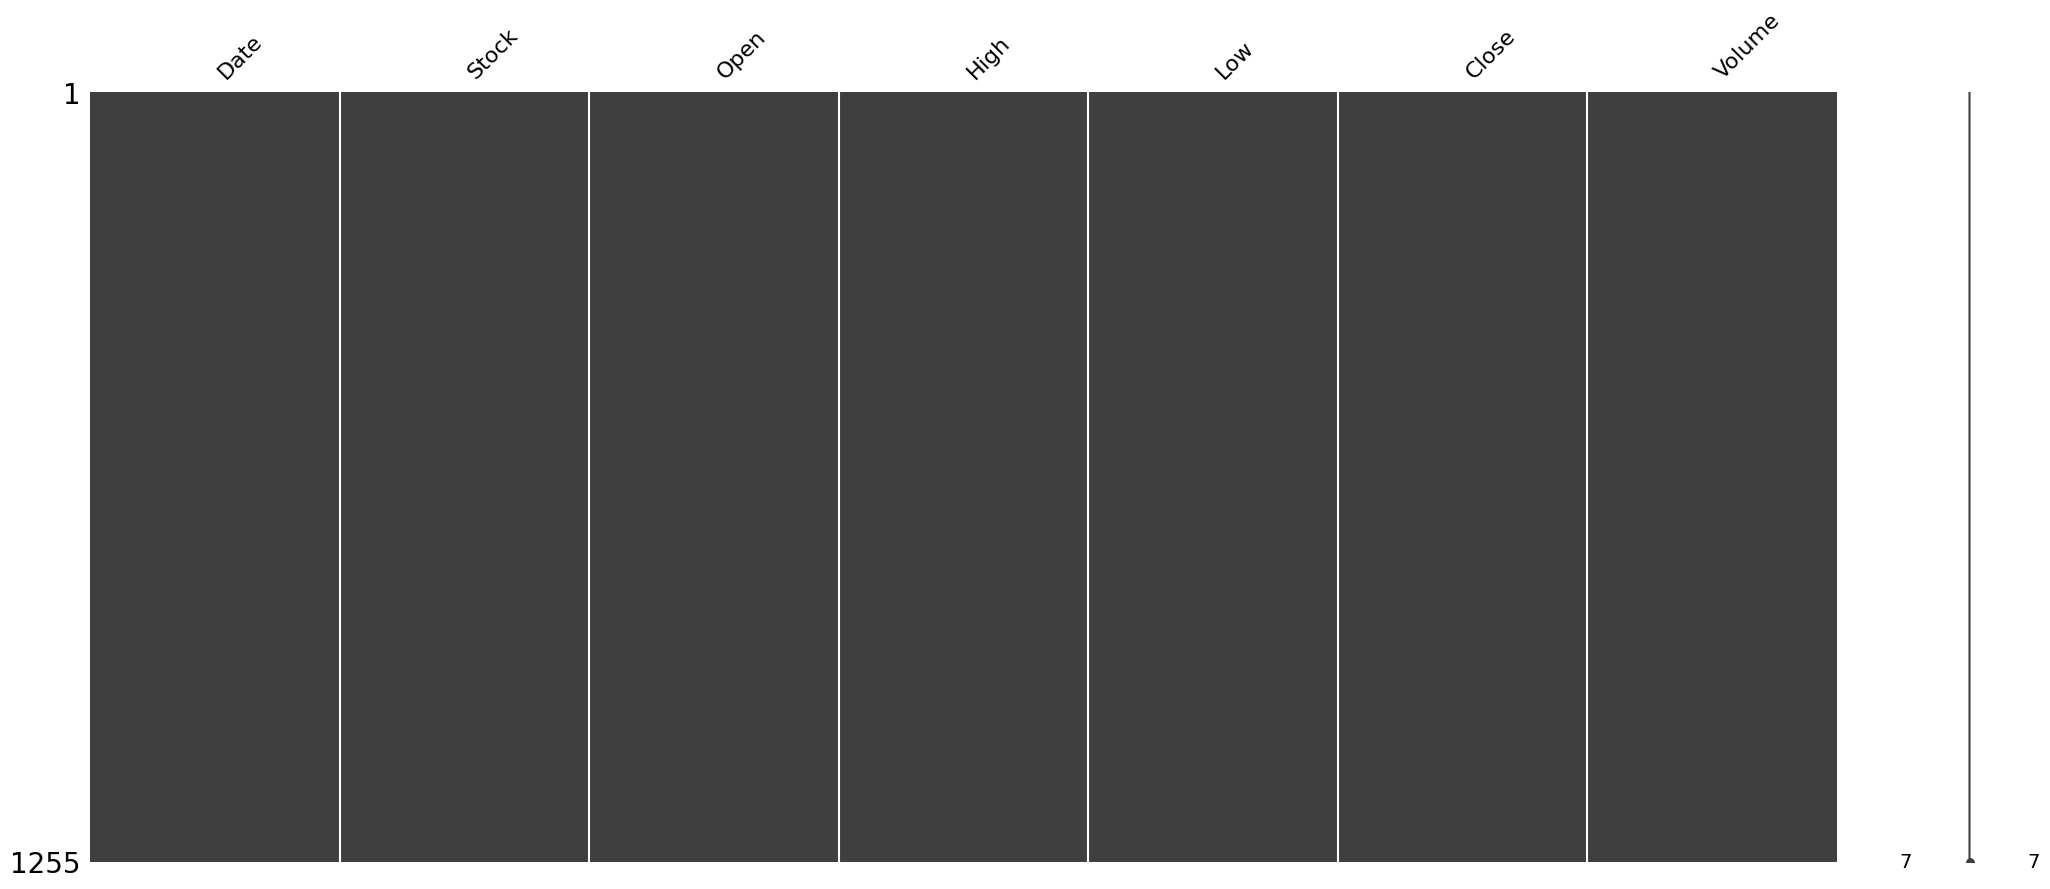

In [8]:
# Visualize missing values in the dataset using a matrix plot  
# This helps in understanding patterns of missing data across different columns  
msno.matrix(df_long)  
plt.show()  # Display the plot  

In [9]:
# Save the cleaned dataset to a CSV file  
# The 'index=False' argument ensures that the index is not included in the saved file  
df_long.to_csv("cleaned_stock_data.csv", index=False)  

In [10]:
# Convert the 'Date' column to datetime format  
# Ensures that the dates are correctly recognized for time series analysis  
df_long["Date"] = pd.to_datetime(df_long["Date"])  

In [11]:
# Set the 'Date' column as the index  
# This is important for time series analysis, making it easier to work with date-based operations  
df_long.set_index("Date", inplace=True)  

In [12]:
print(df_long.index)

DatetimeIndex(['2024-01-02', '2024-01-02', '2024-01-02', '2024-01-02',
               '2024-01-02', '2024-01-03', '2024-01-03', '2024-01-03',
               '2024-01-03', '2024-01-03',
               ...
               '2024-12-27', '2024-12-27', '2024-12-27', '2024-12-27',
               '2024-12-27', '2024-12-30', '2024-12-30', '2024-12-30',
               '2024-12-30', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=1255, freq=None)


In [13]:
df_long.sort_index(inplace=True)

In [14]:
print(df_long.head())

            Stock        Open        High         Low       Close     Volume
Date                                                                        
2024-01-02   AAPL  184.532089  187.315382  182.792533  186.033072   82488700
2024-01-02   AMZN  149.929993  152.380005  148.389999  151.539993   47339400
2024-01-02  GOOGL  137.670929  138.946304  135.987031  138.049561   23711200
2024-01-02   MSFT  367.380585  372.363258  363.319154  370.342443   25258600
2024-01-02   TSLA  248.419998  251.250000  244.410004  250.080002  104654200


<span style="font-size: 20px">2. Exploratory Data Analysis (EDA)</span>

In [2]:
print(df_long.info())

NameError: name 'df_long' is not defined

In [15]:
print(df_long.describe())

              Open         High          Low        Close        Volume
count  1255.000000  1255.000000  1255.000000  1255.000000  1.255000e+03
mean    240.398219   243.069283   237.506305   240.307800  4.825246e+07
std      98.301219    99.118285    97.335554    98.327543  3.467451e+07
min     130.925369   132.758744   130.198020   131.403656  7.164500e+06
25%     174.434998   176.225628   172.329422   174.169998  2.332390e+07
50%     191.606018   194.336857   189.130005   191.152342  3.791210e+07
75%     251.102142   254.999972   246.195000   250.540001  6.238970e+07
max     479.859985   488.540009   461.772294   475.899994  3.186799e+08


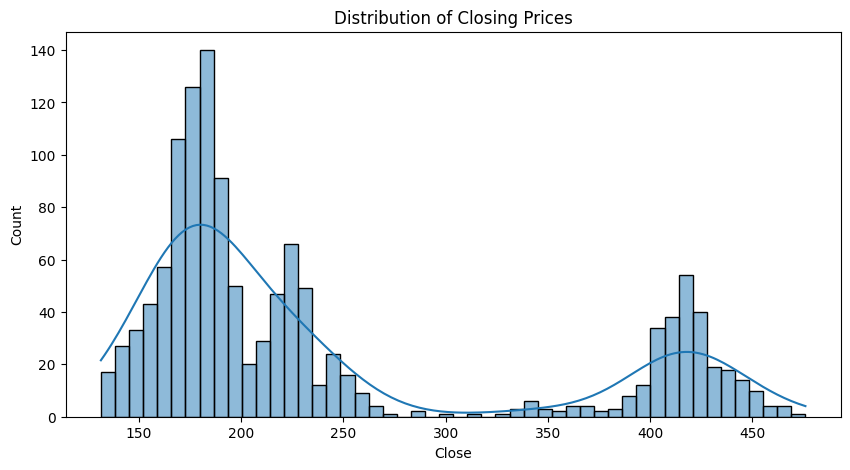

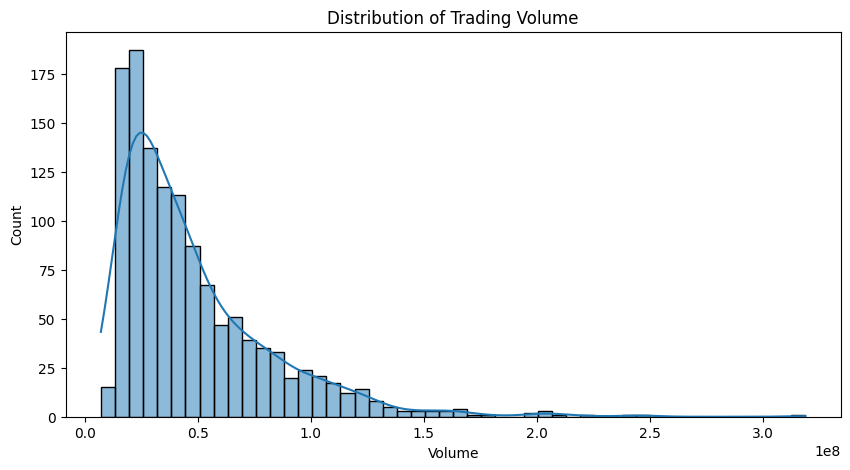

In [16]:
# Plot distribution of closing prices  
# This histogram helps visualize the frequency of different closing prices across all stocks  
plt.figure(figsize=(10,5))
sns.histplot(df_long["Close"], bins=50, kde=True)
plt.title("Distribution of Closing Prices")
plt.show()

# Plot distribution of trading volume  
# This histogram shows the spread of trading volumes, highlighting patterns in stock activity  
plt.figure(figsize=(10,5))
sns.histplot(df_long["Volume"], bins=50, kde=True)
plt.title("Distribution of Trading Volume")
plt.show()

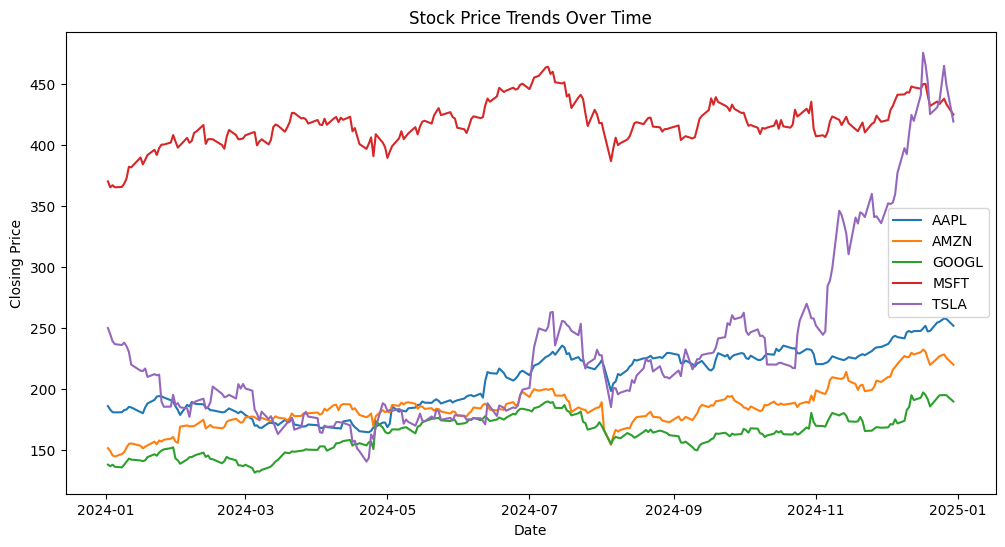

In [17]:
plt.figure(figsize=(12,6))

# Loop through each stock and plot its closing price over time  
# This helps visualize how each stock's closing price has changed over the given time period  
for stock in df_long["Stock"].unique():
    subset = df_long[df_long["Stock"] == stock]  # Filter data for the specific stock
    plt.plot(subset.index, subset["Close"], label=stock)  # Plot closing price over time

# Set title and labels for better readability  
plt.title("Stock Price Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")

# Display the legend to differentiate between stocks  
plt.legend()

# Show the plot  
plt.show()

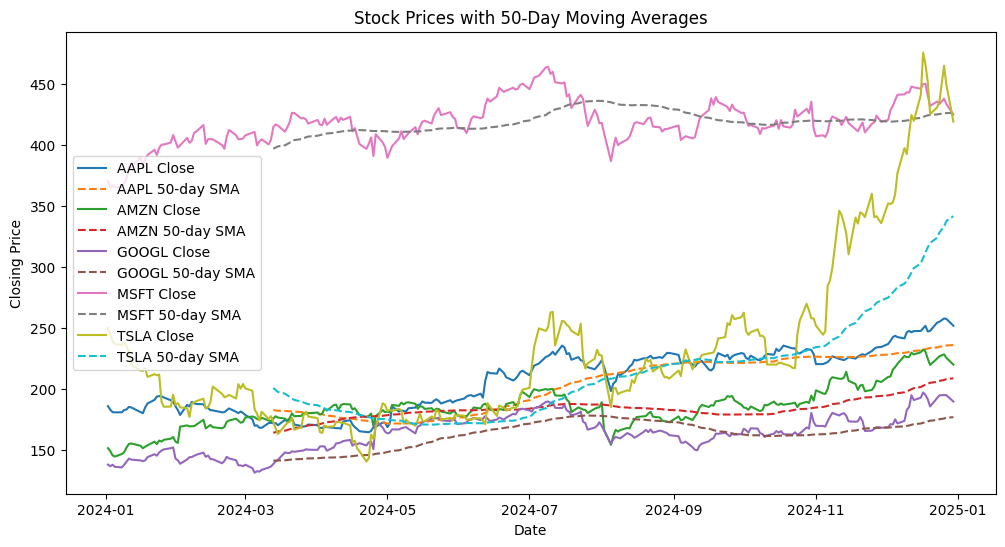

In [18]:
# Calculate the 50-day Simple Moving Average (SMA) for each stock
# SMA helps smooth out price fluctuations to identify trends over time
df_long["SMA_50"] = df_long.groupby("Stock")["Close"].transform(lambda x: x.rolling(window=50).mean())

# Create a figure for visualization
plt.figure(figsize=(12,6))

# Loop through each stock to plot both its closing price and 50-day SMA
for stock in df_long["Stock"].unique():
    subset = df_long[df_long["Stock"] == stock]  # Filter data for the specific stock
    
    # Plot the stock's closing price
    plt.plot(subset.index, subset["Close"], label=f"{stock} Close")
    
    # Plot the 50-day SMA as a dashed line for trend visualization
    plt.plot(subset.index, subset["SMA_50"], linestyle="dashed", label=f"{stock} 50-day SMA")

# Set the title and labels for better readability
plt.title("Stock Prices with 50-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Closing Price")

# Display the legend to differentiate between stocks and moving averages
plt.legend()

# Show the plot
plt.show()

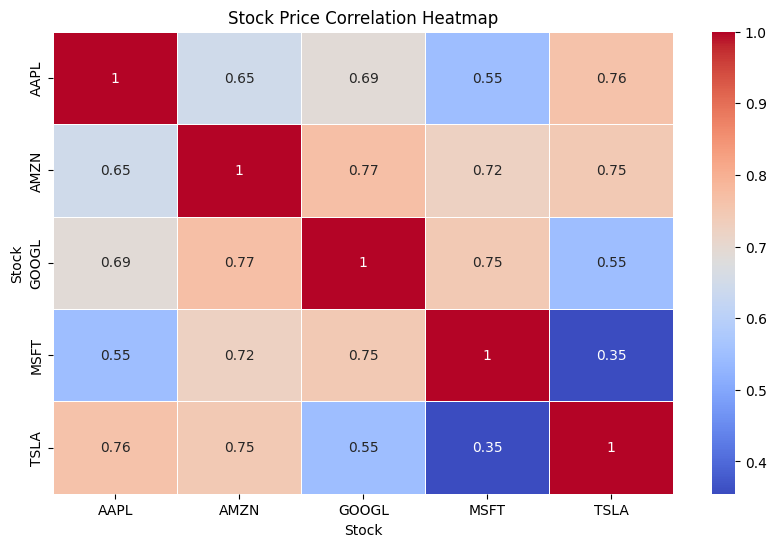

In [19]:
# Pivot the data to create a table where each stock has its own column
# This will allow us to calculate correlations between different stocks
pivot_df = df_long.pivot_table(index="Date", columns="Stock", values="Close")

# Create a figure for the heatmap visualization
plt.figure(figsize=(10,6))

# Generate a heatmap to visualize the correlation matrix of stock closing prices
# Correlation values range from -1 (strong negative correlation) to 1 (strong positive correlation)
sns.heatmap(pivot_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)

# Set the title for better readability
plt.title("Stock Price Correlation Heatmap")

# Show the heatmap plot
plt.show()

<span style="font-size: 20px;">3. Feature Engineering</span>

In [20]:
# ---- 1. Create Lagged Features ----
# Adding previous day's closing price as a new feature
df_long["Close_Lag_1"] = df_long.groupby("Stock")["Close"].shift(1)
df_long["Close_Lag_3"] = df_long.groupby("Stock")["Close"].shift(3)
df_long["Close_Lag_7"] = df_long.groupby("Stock")["Close"].shift(7)

In [21]:
# ---- 2. Create Rolling Mean Features ----
# 7-day and 30-day simple moving averages
df_long["SMA_7"] = df_long.groupby("Stock")["Close"].transform(lambda x: x.rolling(window=7).mean())
df_long["SMA_30"] = df_long.groupby("Stock")["Close"].transform(lambda x: x.rolling(window=30).mean())

In [22]:
# ---- 3. Create Percentage Change Feature ----
# Daily return percentage (close-to-close percentage change)
df_long["Daily_Return"] = df_long.groupby("Stock")["Close"].pct_change()

In [23]:
# Display the first few rows to check the new features
print(df_long.head())

# Save the updated dataset with new features
df_long.to_csv("feature_engineered_stock_data.csv")

            Stock        Open        High         Low       Close     Volume  \
Date                                                                           
2024-01-02   AAPL  184.532089  187.315382  182.792533  186.033072   82488700   
2024-01-02   AMZN  149.929993  152.380005  148.389999  151.539993   47339400   
2024-01-02  GOOGL  137.670929  138.946304  135.987031  138.049561   23711200   
2024-01-02   MSFT  367.380585  372.363258  363.319154  370.342443   25258600   
2024-01-02   TSLA  248.419998  251.250000  244.410004  250.080002  104654200   

            SMA_50  Close_Lag_1  Close_Lag_3  Close_Lag_7  SMA_7  SMA_30  \
Date                                                                       
2024-01-02     NaN          NaN          NaN          NaN    NaN     NaN   
2024-01-02     NaN          NaN          NaN          NaN    NaN     NaN   
2024-01-02     NaN          NaN          NaN          NaN    NaN     NaN   
2024-01-02     NaN          NaN          NaN          NaN  

In [24]:
df_long[["Stock", "Close", "Close_Lag_1"]].head(10)

,Stock,Close,Close_Lag_1
Date,,,
2024-01-02,AAPL,186.033072,NaN
2024-01-02,AMZN,151.539993,NaN
2024-01-02,GOOGL,138.049561,NaN
2024-01-02,MSFT,370.342443,NaN
2024-01-02,TSLA,250.080002,NaN
2024-01-03,AAPL,183.120571,186.033072
2024-01-03,AMZN,149.199997,151.539993
2024-01-03,GOOGL,136.754262,138.049561
2024-01-03,MSFT,365.538123,370.342443


In [25]:
df_long[["Stock", "Close", "SMA_7", "SMA_30"]].head(15)

,Stock,Close,SMA_7,SMA_30
Date,,,,
2024-01-02,AAPL,186.033072,NaN,NaN
2024-01-02,AMZN,151.539993,NaN,NaN
2024-01-02,GOOGL,138.049561,NaN,NaN
2024-01-02,MSFT,370.342443,NaN,NaN
2024-01-02,TSLA,250.080002,NaN,NaN
2024-01-03,AAPL,183.120571,NaN,NaN
2024-01-03,AMZN,149.199997,NaN,NaN
2024-01-03,GOOGL,136.754262,NaN,NaN
2024-01-03,MSFT,365.538123,NaN,NaN


In [26]:
df_long[["Stock", "Close", "Daily_Return"]].head(10)

,Stock,Close,Daily_Return
Date,,,
2024-01-02,AAPL,186.033072,NaN
2024-01-02,AMZN,151.539993,NaN
2024-01-02,GOOGL,138.049561,NaN
2024-01-02,MSFT,370.342443,NaN
2024-01-02,TSLA,250.080002,NaN
2024-01-03,AAPL,183.120571,-0.015656
2024-01-03,AMZN,149.199997,-0.015441
2024-01-03,GOOGL,136.754262,-0.009383
2024-01-03,MSFT,365.538123,-0.012973
